In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
!ls data/

_97bd1c1e5df9537bb13398c9898deed7_detroit-blight-violations.csv
buildings.csv
_dcebfb2135a2bf5a6392493bd61aba22_detroit-311.csv
_dcebfb2135a2bf5a6392493bd61aba22_detroit-crime.csv
_dcebfb2135a2bf5a6392493bd61aba22_detroit-demolition-permits.tsv


In [3]:
call_data = pd.read_csv("data/_dcebfb2135a2bf5a6392493bd61aba22_detroit-311.csv")
call_data.shape

(19680, 15)

In [4]:
call_data.head()

,ticket_id,city,issue_type,ticket_status,issue_description,rating,ticket_closed_date_time,acknowledged_at,ticket_created_date_time,ticket_last_updated_date_time,address,lat,lng,location,image
0,1516722,City of Detroit,Clogged Drain,Acknowledged,"Two drains one on each side of street, street ...",3,NaN,03/06/2015 10:03:38 PM,03/06/2015 09:57:52 PM,04/12/2015 01:01:10 AM,"13120-13130 Ilene Street Detroit, MI 48238, USA",42.383998,-83.161039,"(42.3839977668, -83.1610385642)",NaN
1,1525361,City of Detroit,Clogged Drain,Acknowledged,standing water on lumplin,2,NaN,03/11/2015 04:23:11 PM,03/11/2015 04:14:29 PM,04/07/2015 02:04:44 PM,"1485 E. Outer Drive Detroit, Michigan",42.440471,-83.080919,"(42.4404708, -83.080919)",NaN
2,1525218,City of Detroit,Clogged Drain,Closed,CITZEN CALLED TO REPORT CLOGGED DRAINS,2,08/15/2015 12:03:43 AM,03/11/2015 03:39:05 PM,03/11/2015 03:26:20 PM,08/15/2015 12:03:44 AM,"15460 Eastburn Detroit, Michigan",42.445244,-82.962038,"(42.445244, -82.962038)",NaN
3,1525214,City of Detroit,Clogged Drain,Acknowledged,Citizen called DWSD to report clogged drain,3,NaN,03/11/2015 03:35:02 PM,03/11/2015 03:22:42 PM,06/07/2015 10:07:48 PM,"17541 Mendota St Detroit, Michigan",42.421043,-83.166194,"(42.421043, -83.166194)",NaN
4,1525142,City of Detroit,Clogged Drain,Acknowledged,@ THE CORNER OF GRIGGS & MARGARETA,2,NaN,03/11/2015 03:04:59 PM,03/11/2015 02:53:23 PM,03/11/2015 03:04:59 PM,"Griggs Detroit, Michigan",42.402033,-83.162874,"(42.4020334, -83.1628741)",NaN


In [6]:
call_data.issue_type.value_counts()

Illegal Dumping / Illegal Dump Sites                                                         3584
Tree Issue                                                                                   3546
Running Water in a Home or Building                                                          2655
Clogged Drain                                                                                2490
Potholes                                                                                     2399
Traffic Sign Issue                                                                           1030
Water Main Break                                                                              778
Fire Hydrant Issue                                                                            678
Abandoned Vehicle                                                                             638
Manhole Cover Issue                                                                           546
Traffic Signal Issue

In [11]:
call_data = call_data[call_data.lng > -85]

In [22]:
pltdf = call_data[call_data.issue_type == 'Trash Issue - Bulk waste deposited more than 24 hours before designated time']

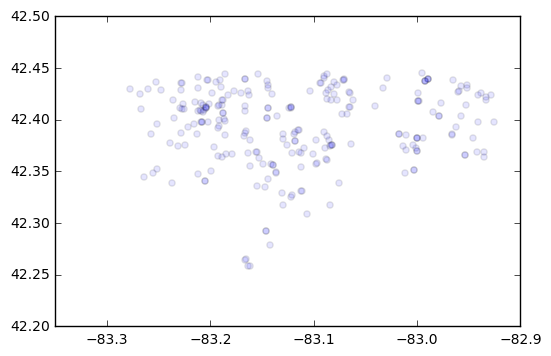

In [23]:
plt.scatter(pltdf.lng, pltdf.lat, alpha=0.1)

In [24]:
crime_data = pd.read_csv("data/_dcebfb2135a2bf5a6392493bd61aba22_detroit-crime.csv")
crime_data.shape

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(119931, 17)

In [25]:
demolition_data = pd.read_csv("data/_dcebfb2135a2bf5a6392493bd61aba22_detroit-demolition-permits.tsv", sep='\t')
demolition_data.shape

(7133, 55)

In [12]:
demolition_data.BLD_PERMIT_TYPE.unique()

array(['Dismantle', 'DISM'], dtype=object)

In [26]:
def add_latlon(df, col):
    """Add latlon column to the df by extracting from col"""
    df_ = df.copy()    
    df_[col] = df_[col].fillna('')

    geo_pat = re.compile('\((.+), (.+)\)')
    df_['lat'] = df_[col].apply(lambda x: float(re.search(geo_pat, x).group(1)) if re.search(geo_pat, x) else np.nan)
    df_['lon'] = df_[col].apply(lambda x: float(re.search(geo_pat, x).group(2)) if re.search(geo_pat, x) else np.nan)
#     geo_pat = re.compile('\((.+)\)')
#     df_['latlon'] = df_[col].apply(lambda x: re.search(geo_pat, x).group(1) if re.search(geo_pat, x) else np.nan)

    return df_

In [27]:
from geopy.distance import distance
def get_distance(A, B):
    return distance((A[0], A[1]), (B[0], B[1])).meters

In [28]:
demolition_df = demolition_data.dropna(subset=['site_location'])
demolition_df = add_latlon(demolition_df, 'site_location')

In [29]:
buildings_df = pd.read_csv("data/buildings.csv", index_col='No')

In [18]:
# def get_buildings(lat, lon, r=20):
#     """Given lat, lon, return building No. from building_df.
#     Building is defined as a circle of radius 20m
#     """
#     try:
#         dist = buildings_df.apply(lambda x: get_distance((x.lat, x.lon), (lat, lon)), axis=1)
#         return dist[dist < r].index.to_list()
#     except AttributeError:
#         return ''

### Use knn model for labeling new data
row-wise calculation is too slow. knn uses tree structure and parallelization to speed up

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knnmodel = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', n_jobs=10)

In [32]:
knnmodel.fit(buildings_df[['lat', 'lon']].values, buildings_df.index)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=1, p=2,
           weights='uniform')

In [34]:
X = demolition_df[['lat', 'lon']].dropna()
X['building_no'] = knnmodel.predict(X.values)

In [35]:
## total number of demolished buildings
len(X.building_no.unique())

4003

In [36]:
buildings_df['demolished'] = buildings_df.index.isin(X.building_no)

In [37]:
buildings_df.head(10)

,lat,lon,demolished
No,,,
0,42.363186,-83.091669,False
1,42.429329,-83.220389,False
2,42.428929,-83.227529,False
3,42.441671,-83.144992,False
4,42.418294,-83.153599,False
5,42.420965,-83.153742,False
6,42.331681,-83.047996,True
7,42.427744,-83.144551,False
8,42.352897,-83.223485,False


In [38]:
buildings_df.demolished.value_counts()

False    36266
True      4003
Name: demolished, dtype: int64

In [41]:
incident_data = pd.read_csv("data/_97bd1c1e5df9537bb13398c9898deed7_detroit-blight-violations.csv")
incident_data.head()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,...,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,...,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630..."
1,19800,05000025DAH,Department of Public Works,"JACKSON, RAECHELLE",19014,ASHTON,20501,HEYDEN,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"19014 ASHTON\nDetroit, MI\n(42.429390762000025...","20501 HEYDEN\nDETROIT, MI 48219\n(42.442177633..."
2,19804,05000026DAH,Department of Public Works,"TALTON, CAROL ANN",18735,STAHELIN,18735,STAHELI N,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"18735 STAHELIN\nDetroit, MI\n(42.4287074590000...","18735 STAHELI N\nDETROIT, MI 48219\n(42.428707..."
3,20208,05000027DAH,Department of Public Works,"BONNER, DARRYL E.",20125,MONICA,25335,PEEKSKILL,SOUTHFIELD,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,NO PAYMENT APPLIED,0.0,0,"20125 MONICA\nDetroit, MI\n(42.44169828400004,...","25335 PEEKSKILL\nSOUTHFIELD, MI 48043\n(42.475..."
4,20211,05000028DAH,Department of Public Works,"GREGORY, JAMES LEE",17397,PRAIRIE,17397,PRAIRIE,DETROIT,MI,...,$20.00,$10.00,$10.00,$0.00,$140.00,PAID IN FULL,0.0,0,"17397 PRAIRIE\nDetroit, MI\n(42.42031769500005...","17397 PRAIRIE\nDETROIT, MI 48221\n(42.42031769..."


In [42]:
inci_df = incident_data.copy()
geo_pat = re.compile('\((.+), (.+)\)')
inci_df['lat'] = inci_df.ViolationAddress.apply(lambda x: float(re.search(geo_pat, x).group(1)))
inci_df['lon'] = inci_df.ViolationAddress.apply(lambda x: float(re.search(geo_pat, x).group(2)))

#### build feature:
- number of blight violations for each building

In [44]:
inci_df['building_no'] = knnmodel.predict(inci_df[['lat', 'lon']])

In [45]:
len(inci_df.building_no.unique())

40269

In [39]:
# train_data = pd.merge(train_data, pd.crosstab(inci_df.building_no, inci_df.ViolationCode),
#                       how='left', left_index=True, right_index=True)

In [66]:
train_data = pd.concat([buildings_df[buildings_df.demolished == False].sample(4003),
                        buildings_df[buildings_df.demolished == True]])

In [67]:
building_violation_counts = inci_df.building_no.value_counts()

In [68]:
train_data['violation_counts'] = building_violation_counts[train_data.index]

In [69]:
train_data.head()
## index of train_data is building no.

,lat,lon,demolished,violation_counts
No,,,,
6429,42.367879,-83.225238,False,8
21754,42.362546,-83.094410,False,7
31957,42.438397,-83.176161,False,1
26723,42.354827,-83.264773,False,3
10613,42.352708,-83.166368,False,2


In [70]:
train_data.groupby('demolished').mean()

,lat,lon,violation_counts
demolished,,,
False,42.391517,-83.109362,6.392955
True,42.384212,-83.090413,18.223582


In [45]:
# train_data = pd.merge(train_data, pd.crosstab(inci_df.building_no, inci_df.PaymentStatus),
#                       how='left', left_index=True, right_index=True)

In [51]:
def add_label(df, building_index=False):
    if building_index: #df's index is building no.
        tdf = pd.merge(df, buildings_df, left_index=True, right_index=True, how='left')
    else:
        tdf = pd.merge(df, buildings_df, left_on='building_no', right_index=True, how='left')
    return tdf

def subsample_df(df):
    return pd.concat([df[df.demolished == False].sample(4003),
                        df[df.demolished == True]])


In [52]:
crime_data.columns

Index([u'ROWNUM', u'CASEID', u'INCINO', u'CATEGORY', u'OFFENSEDESCRIPTION',
       u'STATEOFFENSEFILECLASS', u'INCIDENTDATE', u'HOUR', u'SCA', u'PRECINCT',
       u'COUNCIL', u'NEIGHBORHOOD', u'CENSUSTRACT', u'ADDRESS', u'LON', u'LAT',
       u'LOCATION'],
      dtype='object')

In [53]:
print crime_data.shape
crime_data = crime_data.dropna(subset=['LAT', 'LON'])
crime_data['building_no'] = knnmodel.predict(crime_data[['LAT', 'LON']].values)
print crime_data.shape

(119931, 17)
(119872, 18)


In [54]:
### Remove outliers from crime data
buildings_df.describe()

,lat,lon
count,40269.000000,40269.000000
mean,42.389958,-83.108051
std,0.035849,0.097033
min,42.255342,-83.287664
25%,42.364167,-83.188941
50%,42.393257,-83.119054
75%,42.419537,-83.022759
max,42.449452,-82.910654


In [55]:
mask = (crime_data['LAT'] >= 42.255) & (crime_data.LAT <= 42.450) \
       & (crime_data.LON >= -83.287) & (crime_data.LON <= -82.911)
original_size = crime_data.shape[0]
crime_data = crime_data[mask]
print original_size - crime_data.shape[0]

572


## Training Model

#### use only violation counts as feature

In [71]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import cross_validation

In [72]:
# train_X = train_data.drop(['demolished', 'lat', 'lon'], axis=1)
train_X = train_data['violation_counts']
train_y = train_data.demolished

In [73]:
model1 = LogisticRegression(penalty='l1')

In [74]:
model1.fit(train_X.reshape(-1, 1), train_data.demolished)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
results = cross_validation.cross_val_score(model1, train_X.reshape(-1, 1), train_y.values,
                                 cv=5, scoring='accuracy', )
print results, results.mean()

[ 0.73595506  0.67852684  0.59862672  0.4875      0.36125   ] 0.572371722846


#### add more features:
- geo location

In [76]:
train_X = train_data[['violation_counts', 'lat', 'lon']]
model1.fit(train_X, train_data.demolished)
results = cross_validation.cross_val_score(model1, train_X, train_y.values,
                                 cv=5, scoring='accuracy', )
print results, results.mean()

[ 0.73595506  0.67852684  0.59612984  0.4925      0.36125   ] 0.572872347066


In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model2 = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split=10, n_jobs=-1)

In [79]:
model2.fit(train_X, train_y)
results = cross_validation.cross_val_score(model2, train_X, train_y.values,
                                 cv=5, scoring='accuracy')
print results, results.mean()

[ 0.62484395  0.66229713  0.63108614  0.54625     0.378125  ] 0.568520443196


In [80]:
sorted(zip(model2.feature_importances_, train_X.columns), reverse=True, )

[(0.40333478261698819, 'lon'),
 (0.36838081936658779, 'lat'),
 (0.22828439801642419, 'violation_counts')]

### plot train data

In [130]:
train_X = train_data[['violation_counts', 'lat', 'lon']]

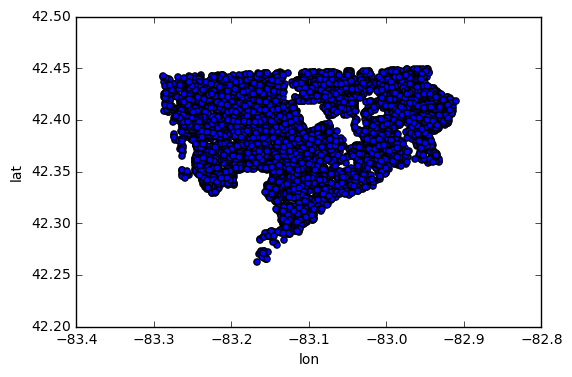

In [133]:
train_X.plot('lon', 'lat', kind='scatter', c)

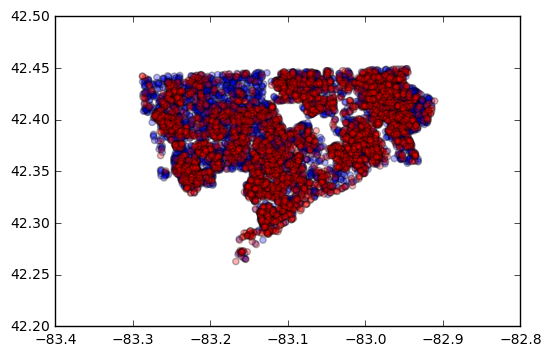

In [139]:
colors = {True: 'r', False: 'b'}

plt.scatter(train_X['lon'], train_X['lat'], c=train_y.map(lambda x: colors[x]), alpha=0.3)

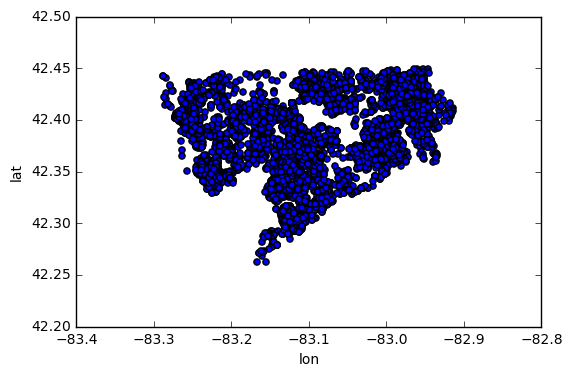

In [500]:
## remove outliers
demolition_df = demolition_df[demolition_df.lon < 0]

demolition_df.plot('lon', 'lat', kind='scatter')

In [181]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool
)
output_notebook()

Loading BokehJS ...

In [154]:
p = figure(plot_width=600, plot_height=400)
p.scatter(demolition_df['lon'], demolition_df['lat'], alpha=0.1, )
show(p)

In [81]:
from sklearn.cluster import DBSCAN 

In [89]:
dbmodel = DBSCAN(eps=0.0055, min_samples=20, algorithm='kd_tree', )
# model = DBSCAN(eps=0.00005, min_samples=10, algorithm='kd_tree', )
demolition_df = demolition_df[['lat', 'lon']].dropna()

## remove outliers
demolition_df = demolition_df[demolition_df.lon < 0]

dbmodel.fit(demolition_df[['lat', 'lon']])

DBSCAN(algorithm='kd_tree', eps=0.0055, leaf_size=30, metric='euclidean',
    min_samples=20, n_jobs=1, p=None)

In [90]:
print set(dbmodel.labels_)

set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, -1])


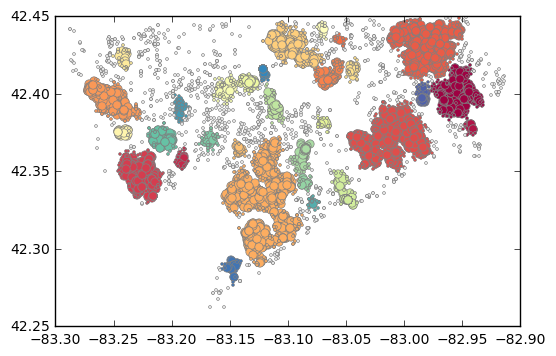

In [91]:
## pretty plotting
labels = dbmodel.labels_
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# plot core samples bigger
core_samples_mask = np.zeros_like(dbmodel.labels_, dtype=bool)
core_samples_mask[dbmodel.core_sample_indices_] = True

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'whitesmoke'
    class_member_mask = (labels == k)
    xy = demolition_df[class_member_mask & core_samples_mask]
    plt.plot(xy['lon'], xy['lat'], 'o', markerfacecolor=col,
             markeredgecolor='grey', markersize=6)

    xy = demolition_df[class_member_mask & ~core_samples_mask]
    plt.plot(xy['lon'], xy['lat'], 'o', markerfacecolor=col,
             markeredgecolor='grey', markersize=2)


In [92]:
import scipy as sp
def dbscan_predict(dbscan_model, X_new, metric=sp.spatial.distance.euclidean):
    # Result is noise by default
    y_new = np.ones(shape=len(X_new), dtype=int)*-1 

    # Iterate all input samples for a label
    for j, x_new in enumerate(X_new):
        # Find a core sample closer than EPS
        for i, x_core in enumerate(dbscan_model.components_): 
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break

    return y_new

In [93]:
y_new = dbscan_predict(dbmodel, train_data[['lat', 'lon']].values)

In [94]:
tdf = train_data[['lat', 'lon', 'demolished']]

In [95]:
tdf['group'] = y_new

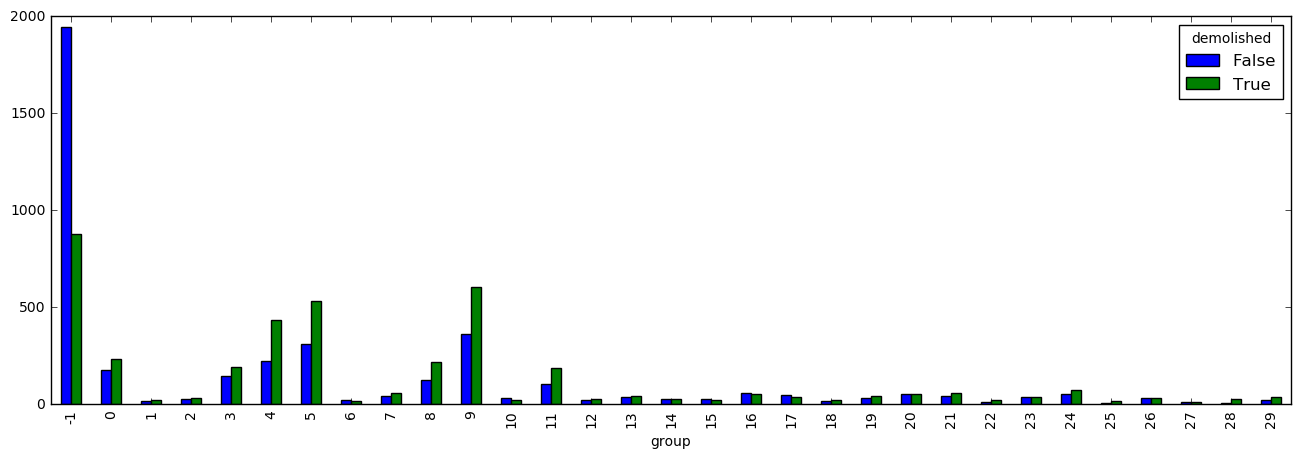

In [96]:
pd.crosstab(tdf.group, tdf.demolished).plot(kind='bar', figsize=(16, 5))

==> group seems to be indicative: -1 is more likely to be non-demolished, whereas the rest of the groups are more likely to be demolished

In [97]:
train_data['group'] = y_new
train_data['group'] = train_data['group'].apply(lambda x: 1 if x >=0 else x)

In [98]:
train_X = train_data[['violation_counts', 'group', 'lat', 'lon']]
train_y = train_data.demolished

In [99]:
model1 = LogisticRegression(penalty='l1')
model1.fit(train_X, train_y)
results = cross_validation.cross_val_score(model1, train_X, train_y.values,
                                 cv=5, scoring='accuracy', )
print results, results.mean()

[ 0.65106117  0.66042447  0.62359551  0.614375    0.615     ] 0.632891229713


In [100]:
model2 = RandomForestClassifier(n_estimators=300, max_depth=5, n_jobs=-1)
model2.fit(train_X, train_y)
results = cross_validation.cross_val_score(model2, train_X, train_y.values,
                                 cv=5, scoring='accuracy', )
print results, results.mean()

[ 0.64419476  0.66479401  0.63358302  0.60375     0.3975    ] 0.588764357054


In [532]:
train_data.head()

,lat,lon,demolished,violation_counts,group
No,,,,,
1678,42.414700,-82.989810,False,4,1
36578,42.414277,-83.163458,False,1,-1
31895,42.422951,-83.171433,False,1,-1
38759,42.409336,-82.938000,False,1,-1
23645,42.434000,-83.244326,False,2,-1


In [393]:
# from sklearn.model_selection import GridSearchCV

# param_grid = [{'max_depth': range(2, 8), 'n_estimators': [20, 100, 500, 1000]}]

# clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid, cv=5, scoring='accuracy')
# clf.fit(train_X, train_data.demolished)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [20, 100, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

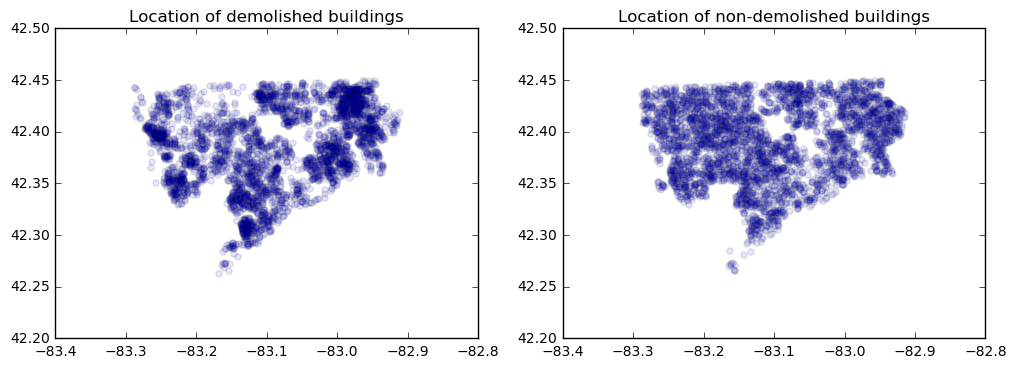

In [261]:
# colors = {True: 'r', False: 'b'}
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
xy = train_data[train_data.demolished == True]
ax[0].scatter(xy['lon'], xy['lat'], alpha=0.1)
ax[0].set_title('Location of demolished buildings')
xy = train_data[train_data.demolished == False]
ax[1].scatter(xy['lon'], xy['lat'], alpha=0.1)
ax[1].set_title('Location of non-demolished buildings')

In [168]:
from sklearn.cluster import KMeans

In [265]:
model = KMeans(n_clusters=10, max_iter=300)
model.fit(demolition_df[['lat', 'lon']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

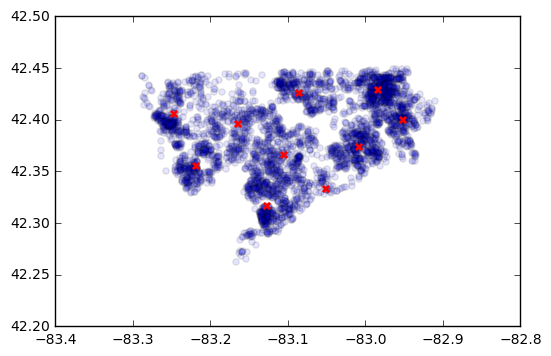

In [266]:
# plt.scatter(demolition_df['lon'], demolition_df['lat'], alpha=0.1, )
xy = train_data[train_data.demolished == True]
plt.scatter(xy['lon'], xy['lat'], alpha=0.1)
plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 0], color='red', marker='x', linewidth=2)

==> seems DBSCAN is better than kmeans, as kmeans assumes equal cluster size

#### Add more features
- crime
- 311

In [442]:
crime_data.head()

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION,building_no
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)",5586
1,17631,1917717,1503010158.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,03/01/2015 12:00:00 AM,9,608.0,6.0,City Council District 7,GRANDALE,5452.0,00 PLYMOUTH AND MANSFIELD,-83.2035,42.3724,"00 PLYMOUTH AND MANSFIELD\n(42.3725, -83.2033)",12289
2,11207,1910955,1502080223.1,STOLEN VEHICLE,VEHICLE THEFT,24001.0,02/08/2015 12:00:00 AM,18,1105.0,11.0,City Council District 3,OUTER DRIVE VAN DYKE,5051.0,00 E 7 MILE VAN DYKE,-83.0241,42.4338,"00 E 7 MILE VAN DYKE\n(42.4339, -83.0241)",15158
3,116589,2018186,1511090188.1,WEAPONS OFFENSES,WEAPONS OFFENSE (OTHER),52003.0,11/09/2015 12:00:00 AM,12,210.0,2.0,City Council District 6,TIREMAN,NaN,06600 BARTON,-83.1381,42.3496,"BARTON\n06600\n(42.3494, -83.1379)",22640
4,85790,1986862,1508239803.1,LARCENY,LARCENY - PARTS AND ACCESSORIES FROM VEHICLE,23006.0,08/14/2015 12:00:00 AM,7,309.0,3.0,City Council District 6,WEST CANFIELD,5204.0,00900 W WILLIS,-83.0692,42.3481,"W WILLIS\n00900\n(42.3481, -83.0693)",28580


In [536]:
crime_data.shape

(119300, 18)

In [537]:
crime_data.CATEGORY.value_counts()

TRAFFIC VIOLATIONS-MOTORCYCLE VIOLATIONS       29258
ASSAULT                                        16414
LARCENY                                        14097
DAMAGE TO PROPERTY                              9395
AGGRAVATED ASSAULT                              8256
BURGLARY                                        7751
STOLEN VEHICLE                                  6937
TRAFFIC VIOLATIONS-DRIVING ON SUSPENDED         5738
FRAUD                                           4892
ROBBERY                                         3178
DANGEROUS DRUGS                                 3100
OBSTRUCTING JUDICIARY                           1399
WEAPONS OFFENSES                                1253
ESCAPE                                           905
SOLICITATION                                     846
BRIBERY                                          831
ARSON                                            785
OUIL DISPOSE OF VEHICLE TO AVOID FORFEITURE      748
RUNAWAY                                       

In [569]:
crimes_by_building = pd.crosstab(crime_data.building_no, crime_data.CATEGORY)

In [594]:
new_train = pd.merge(train_data, crimes_by_building, left_index=True, right_index=True)
# new_train = pd.merge(train_data, pd.DataFrame(crime_data.groupby('building_no').count()['CATEGORY']), 
#                      left_index=True, right_index=True)

In [605]:
train_X = new_train.drop(labels=['demolished', 'lat', 'lon'], axis=1)
train_y = new_train.demolished

model1 = LogisticRegression(penalty='l2')
model1.fit(train_X, train_y)
results = cross_validation.cross_val_score(model1, train_X, train_y.values,
                                 cv=5, scoring='accuracy', )
print results, results.mean()

[ 0.62564544  0.63080895  0.62564544  0.63049096  0.60378984] 0.623276124061


In [592]:
model2 = RandomForestClassifier(n_estimators=500, max_depth=6, n_jobs=-1)
model2.fit(train_X, train_y)
results = cross_validation.cross_val_score(model2, train_X, train_y.values,
                                 cv=5, scoring='accuracy', )
print results, results.mean()

[ 0.61531842  0.63339071  0.63339071  0.64857881  0.57450474] 0.62103667531


In [595]:
new_train.head()

,lat,lon,demolished,violation_counts,group,AGGRAVATED ASSAULT,ANTITRUST,ARSON,ASSAULT,BRIBERY,...,RUNAWAY,SOLICITATION,SOVEREIGNTY,STOLEN PROPERTY,STOLEN VEHICLE,TAX REVENUE,TRAFFIC VIOLATIONS-DRIVING ON SUSPENDED,TRAFFIC VIOLATIONS-MOTORCYCLE VIOLATIONS,VAGRANCY (OTHER),WEAPONS OFFENSES
2,42.428929,-83.227529,False,9,-1,0,0,0,2,0,...,0,0,0,0,0,0,0,2,0,0
6,42.331681,-83.047996,True,21114,1,0,0,0,5,0,...,0,2,0,0,1,0,2,14,0,0
9,42.355041,-83.226089,True,33,1,0,0,0,2,0,...,0,0,0,0,0,0,1,0,0,0
14,42.355593,-83.231006,True,9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17,42.414247,-83.129067,False,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [602]:
from sklearn.feature_selection import SelectKBest, chi2

In [620]:
train_X['group'] = train_X['group'].apply(lambda x: 0 if x < 0 else x)
X_new = SelectKBest(chi2, k=15).fit_transform(train_X, train_y)

In [623]:
model1 = LogisticRegression(penalty='l1')
model1.fit(X_new, train_y)
results = cross_validation.cross_val_score(model1, X_new, train_y.values,
                                 cv=5, scoring='accuracy', )
print results, results.mean()

[ 0.62736661  0.63166954  0.63080895  0.63996555  0.60120586] 0.626203299725


In [622]:
model2 = RandomForestClassifier(n_estimators=500, max_depth=3, n_jobs=-1)
model2.fit(X_new, train_y)
results = cross_validation.cross_val_score(model2, X_new, train_y.values,
                                 cv=5, scoring='accuracy', )
print results, results.mean()

[ 0.64285714  0.62908778  0.63683305  0.63307494  0.59259259] 0.626889099402


In [613]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
def train_model(model, X, y):
    model.fit(X, y)
    results = cross_validation.cross_val_score(model, X, y,
                                 cv=5, scoring='accuracy', )
    print results, results.mean()

In [616]:
gbt = GradientBoostingClassifier()
train_model(gbt, X_new, train_y)

[ 0.62994836  0.62908778  0.62822719  0.65891473  0.5796727 ] 0.625170152741


In [101]:
call_data.issue_type.value_counts()

Illegal Dumping / Illegal Dump Sites                                                         3584
Tree Issue                                                                                   3546
Running Water in a Home or Building                                                          2654
Clogged Drain                                                                                2490
Potholes                                                                                     2399
Traffic Sign Issue                                                                           1030
Water Main Break                                                                              778
Fire Hydrant Issue                                                                            678
Abandoned Vehicle                                                                             638
Manhole Cover Issue                                                                           546
Traffic Signal Issue

In [102]:
call_data['building_no'] = knnmodel.predict(call_data[['lat', 'lng']])

In [137]:
issues = [
    'Illegal Dumping / Illegal Dump Sites', 'Abandoned Vehicle', 
          'Trash Issue - Bulk waste deposited more than 24 hours before designated time',
          'Curbside Solid Waste Issue', 'Graffiti', 
          'Trash Issue - Improper placement of refuse container between collections/left at curbside',
#           'DPW - Debris Removal',
]

call_df = call_data[call_data.issue_type.isin(issues)]
calls_by_building = pd.crosstab(call_df.building_no, call_df.issue_type)
calls_by_building.head()

issue_type,Abandoned Vehicle,Curbside Solid Waste Issue,Graffiti,Illegal Dumping / Illegal Dump Sites,Trash Issue - Bulk waste deposited more than 24 hours before designated time,Trash Issue - Improper placement of refuse container between collections/left at curbside
building_no,,,,,,
19,0,0,0,1,0,0
37,0,0,0,2,0,0
40,0,0,0,0,1,0
46,1,0,0,0,0,0
54,0,0,0,1,0,0


In [138]:
new_train = pd.merge(train_data, calls_by_building, left_index=True, right_index=True)

In [139]:
train_X = new_train.drop(labels=['demolished', 'lat', 'lon'], axis=1)
train_y = new_train.demolished

train_model(model1, train_X, train_y)

[ 0.61870504  0.66666667  0.6884058   0.61594203  0.60583942] 0.639111788957


In [140]:
train_model(model2, train_X, train_y)

[ 0.58992806  0.61594203  0.68115942  0.62318841  0.5620438 ] 0.614452341649


In [148]:
new_train = pd.merge(train_data, pd.DataFrame(calls_by_building.sum(axis=1)), left_index=True, right_index=True)

In [142]:
train_X = new_train.drop(labels=['demolished', 'lat', 'lon'], axis=1)
train_y = new_train.demolished

train_model(model1, train_X, train_y)

[ 0.60431655  0.67391304  0.68115942  0.61594203  0.62773723] 0.640613653159


In [152]:
train_model(model2, train_X, train_y)

[ 0.59210526  0.67105263  0.69333333  0.69333333  0.54666667] 0.639298245614


In [149]:
crimes = [
    'ASSAULT', 'DAMAGE TO PROPERTY', 'AGGRAVATED ASSAULT', 'ROBBERY', 'DANGEROUS DRUGS', 'ARSON', #'KIDNAPING'
]

crime_df = crime_data[crime_data.CATEGORY.isin(crimes)]
crimes_by_building = pd.crosstab(crime_df.building_no, crime_df.CATEGORY)
new_train = pd.merge(new_train, pd.DataFrame(crimes_by_building.sum(axis=1)), left_index=True, right_index=True)

In [154]:
train_X = new_train.drop(labels=['demolished', 'lat', 'lon'], axis=1)
train_y = new_train.demolished

model1 = LogisticRegression(penalty='l1')
train_model(model1, train_X, train_y)

[ 0.63157895  0.71052632  0.68        0.65333333  0.58666667] 0.652421052632


In [155]:
from sklearn.ensemble import GradientBoostingClassifier

In [170]:
model3 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=3, min_samples_split=5)
train_model(model3, train_X, train_y)

[ 0.57894737  0.68421053  0.74666667  0.72        0.54666667] 0.655298245614


In [171]:
new_train.head()

,lat,lon,demolished,violation_counts,group,0_x,0_y
136,42.419701,-83.283843,True,5,-1,1,2
157,42.385782,-83.140558,False,34,-1,1,2
161,42.332694,-83.151726,True,13,1,5,1
437,42.405961,-83.122546,True,36,-1,1,3
532,42.343864,-83.230523,True,22,1,1,12


In [177]:
new_train.rename(columns={'0_x': 'call_counts', '0_y': 'crime_counts'}, ).to_csv('data/train.csv')